<a href="https://colab.research.google.com/github/kweteM/sentiment-analysis-LSTM/blob/main/Sentiment_Analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Sentiment analysis that uses Long Short-Term Memory (LSTM) networks. Here, we'll use the IMDB movie reviews dataset from Kaggle. This is a binary sentiment classification. The dataset contains labeled movie reviews with sentiment (positive or negative) annotations.

**1. Python Libraries:**

1. TensorFlow
2. Keras (part of TensorFlow)
3. Numpy
4. Pandas
5. Matplotlib
6. NLTK (for text preprocessing)

In [ ]:
import os
import json

from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**2. Data Preprocessing:**

1. Load the dataset.
2. Clean the text data.
3. Tokenize the text data.
4. Pad the sequences to ensure uniform input length.
5. Label Encoding

1. Load the dataset

In [ ]:
# Collect the dataset (Kaggle API)

kaggle_dictionary = json.load(open("kaggle.json"))

# Set up kaggle credentials
os.environ['KAGGLE_USERNAME'] = kaggle_dictionary['username']
os.environ['KAGGLE_KEY'] = kaggle_dictionary['key']

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip the dataset
with ZipFile('imdb-dataset-of-50k-movie-reviews.zip', 'r') as zipObj:
  zipObj.extractall()

!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip   kaggle.json   sample_data


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/IMDB Dataset.csv')

df.sample(5)

,review,sentiment
3316,"This was a truly bad film. The character ""Cole...",negative
683,"Highly regarded at release, but since rather n...",positive
15990,Sylvester the cat stowaway upon a ship that Tw...,negative
19667,John Wayne is one of the few players in film h...,positive
41125,"Without saying how it ended, it is sufficient ...",negative


In [ ]:
# number of rows and columns
df.shape

(50000, 2)

In [ ]:
# the distribution of data
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

2. Clean the text data

In [ ]:
# Data Preprocessing
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    text = " ".join(text)
    return text

df['review'] = df['review'].apply(clean_text)

3. Tokenize the text data.

4. Pad the sequences to ensure uniform input length.

In [ ]:
# Tokenization and Padding
max_vocab_size = 20000
max_length = 200
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

5. Label Encoding

In [ ]:
# Encoding the label
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
labels = df['sentiment'].values

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

**2. Model Building:**

1. Define an LSTM model using Keras.
2. Compile the model.

1. Define an LSTM model using Keras

In [ ]:
# Build the LSTM model
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

2. Compile the model.

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          2000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2117377 (8.08 MB)
Trainable params: 2117377 (8.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**3. Model Training:**

1. Train the model on the training data.

1. Train the model on the training data.

In [ ]:
# Train the model
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/5
625/625 [==============================] - 329s 523ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6928 - val_accuracy: 0.5060
Epoch 2/5
625/625 [==============================] - 332s 531ms/step - loss: 0.6884 - accuracy: 0.5208 - val_loss: 0.5944 - val_accuracy: 0.7670
Epoch 3/5
625/625 [==============================] - 323s 517ms/step - loss: 0.3450 - accuracy: 0.8616 - val_loss: 0.2901 - val_accuracy: 0.8859
Epoch 4/5
625/625 [==============================] - 326s 522ms/step - loss: 0.2295 - accuracy: 0.9170 - val_loss: 0.2694 - val_accuracy: 0.8916
Epoch 5/5
625/625 [==============================] - 324s 518ms/step - loss: 0.1813 - accuracy: 0.9393 - val_loss: 0.2740 - val_accuracy: 0.8912


**4. Model Evaluation:**

1. Evaluate the model on the test data.

1. Evaluate the model on the test data.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 36s 115ms/step - loss: 0.2740 - accuracy: 0.8912
Test Loss: 0.2739975154399872
Test Accuracy: 0.8912000060081482


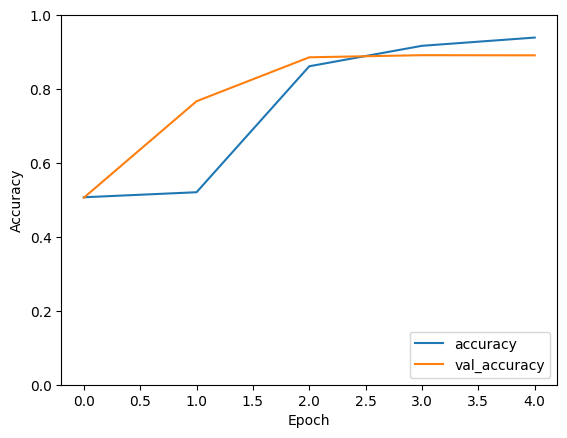

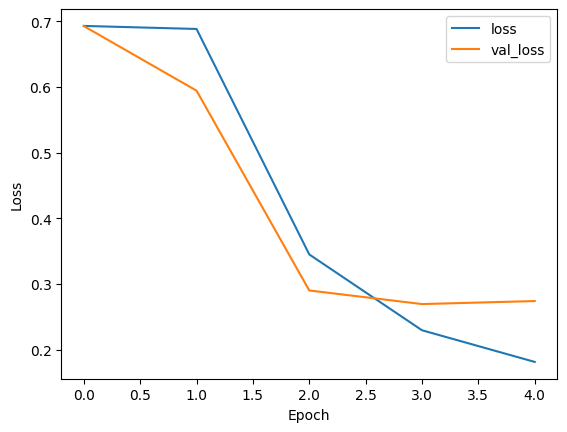

In [ ]:
# Plotting the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()